# STAT 207 Homework 3 [25 points]

## Cleaning, Wrangling, and Reshaping Data

Due: Friday, February 2, end of day (11:59 pm CT)

<hr>

## Student Intro Survey [1 point]

Complete the student intro survey on Canvas to earn the first point for Homework 3.

## Python Component

Run the following code chunk to import the packages needed for this assignment:

- pandas
- matplotlib.pyplot
- seaborn

The first package assists in analyzing a dataset.  The second two packages provide support for visualizations.

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

## 1. Read in and Clean the Data [2.5 points]

Medium is a website where anyone can post an article, share a written story, or create a helpful tutorial to share.  Medium has publications, which are curated collections of articles focused on specific topics.  The data that we will analyze here is about articles collected from Medium publications focused on data science topics.  The original data is accessible here: https://www.kaggle.com/datasets/arnabchaki/medium-articles-dataset

The kaggle data has been slightly modified and is available in the medium.csv file located in this same folder, with primary updates to the date variable.

Read this file in.  Be sure that any missing values are read in appropriately, and show your process for doing so.

No need to drop any observations with missing values at this time.

In [16]:
df = pd.read_csv("medium.csv")
df.head()

,id,url,title,subtitle,claps,responses,reading_time,publication,day,month,year
0,1,https://towardsdatascience.com/not-all-rainbow...,Not All Rainbows and Sunshine: The Darker Side...,Part 1: The Risks and Ethical Issues…,453,11,9,Towards Data Science,27,1,2023
1,2,https://towardsdatascience.com/ethics-in-ai-po...,Ethics in AI: Potential Root Causes for Biased...,An alternative approach to understanding bias ...,311,3,12,Towards Data Science,27,1,2023
2,3,https://towardsdatascience.com/python-tuple-th...,"Python Tuple, The Whole Truth and Only the Tru...",NaN,188,0,24,Towards Data Science,27,1,2023
3,4,https://towardsdatascience.com/dates-and-subqu...,Dates and Subqueries in SQL,Working with dates in SQL,15,1,4,Towards Data Science,27,1,2023
4,5,https://towardsdatascience.com/temporal-differ...,Temporal Differences with Python: First Sample...,NaN,10,0,13,Towards Data Science,27,1,2023


In [17]:
df.dtypes

id               int64
url             object
title           object
subtitle        object
claps           object
responses        int64
reading_time     int64
publication     object
day              int64
month            int64
year             int64
dtype: object

In [18]:
df.isna().sum()

id                0
url               0
title             0
subtitle        425
claps            25
responses         0
reading_time      0
publication       0
day               0
month             0
year              0
dtype: int64

In [19]:
df['claps'].unique()

array(['453', '311', '188', '15', '10', '27', '178', '3200', '426', '847',
       '477', '130', 'missing', '199', '121', '174', '117', '198', '88',
       '210', '372', '104', '132', '80', '2600', '695', '658', '1200',
       '301', '293', '341', '168', '101', '67', '135', '127', '623',
       '475', '65', '11', '22', '57', '260', '275', '509', 'scrape fail',
       '48', '163', '151', '18', '2', '40', '58', '3', '139', '7', '51',
       '411', '743', '381', '262', '145', '85', '140', '1600', '3400',
       '388', '302', '232', '1000', '758', 'error', '32', '110', '560',
       '255', '263', '81', '1700', '968', '92', '396', '52', '185', '241',
       '350', '95', '64', '4', '19', '5', '37', '1100', '892', '87',
       '323', '783', '625', '152', '134', '131', '965', '71', '137', '13',
       '147', '1400', '362', '583', '24', '144', '384', '505', '291',
       '196', '181', '62', '29', '78', '215', '31', '192', '46', '406',
       '493', '448', '487', '39', '100', '1500', '910', '335'

In [20]:
df = pd.read_csv("medium.csv", na_values = ['nan', 'scrape fail', 'error', 'missing', 'scrape failed'] )
df.dtypes
df.isna().sum()

id                0
url               0
title             0
subtitle        425
claps            75
responses         0
reading_time      0
publication       0
day               0
month             0
year              0
dtype: int64

## 2. Understanding the Medium Data [1 point]

How many articles from each publication are in the data?

In [21]:
df['publication'].unique()

array(['Towards Data Science', 'UX Collective', 'The Startup',
       'The Writing Cooperative'], dtype=object)

In [22]:
df_group = df.groupby('publication').agg('count').reset_index()[['publication', 'title']].rename( columns = {'title' : 'articles'})
df_group

,publication,articles
0,The Startup,521
1,The Writing Cooperative,389
2,Towards Data Science,1228
3,UX Collective,360


## 3. Understanding Missing Data [1 points]

**a)** How many missing values are recorded for each variable?

In [23]:
df.isna().sum()

id                0
url               0
title             0
subtitle        425
claps            75
responses         0
reading_time      0
publication       0
day               0
month             0
year              0
dtype: int64

**b)** Let's consider the claps variable in particular.  Filter the data to a smaller copy of the data that only contains those observations that are missing a value for the claps variable.  Be sure to give this subset a name other than the original data frame name. 

In [24]:
df_claps_missing = df.loc[ df['claps'].isna() ]
df_claps_missing

,id,url,title,subtitle,claps,responses,reading_time,publication,day,month,year
12,13,https://writingcooperative.com/kill-your-perfe...,Kill Your Perfectionism with an Abundance Mindset,Perfectionism is a recipe…,NaN,0,3,The Writing Cooperative,27,1,2023
47,48,https://towardsdatascience.com/building-a-reco...,Building a Recommender System using Machine Le...,NaN,NaN,0,6,Towards Data Science,1,3,2023
78,79,https://writingcooperative.com/a-hack-for-crea...,A Hack for Creating Dramatic Effect With Dialo...,NaN,NaN,0,5,The Writing Cooperative,1,3,2023
163,164,https://uxdesign.cc/what-is-healthcares-lego-b...,What is healthcare’s LEGO?,NaN,NaN,0,5,UX Collective,6,2,2023
170,171,https://writingcooperative.com/i-block-people-...,I Block People Who Respond to Articles With a ...,NaN,NaN,0,5,The Writing Cooperative,6,2,2023
...,...,...,...,...,...,...,...,...,...,...,...
2287,2288,https://towardsdatascience.com/sentence-transf...,Sentence Transformers: Meanings in Disguise,How modern language…,NaN,0,12,Towards Data Science,3,1,2023
2398,2399,https://writingcooperative.com/four-lessons-le...,Four Lessons Learned From a Decade and a Half ...,NaN,NaN,0,6,The Writing Cooperative,22,2,2023
2446,2447,https://towardsdatascience.com/umap-variance-e...,UMAP Variance Explained,NaN,NaN,0,19,Towards Data Science,27,3,2023
2476,2477,https://writingcooperative.com/im-tired-of-inf...,I’m Tired of Inferior Writers Getting All the ...,NaN,NaN,0,6,The Writing Cooperative,27,3,2023


## 4. Publication Reading Times [3 points]

**a)** Calculate the mean reading time for each of the Data Science publications.  **Do this in one line of code for full credit.**

In [41]:
df[['publication', 'reading_time']].groupby('publication').agg('mean').reset_index().rename( columns = {'reading_time' : 'mean_reading_time'})

,publication,mean_reading_time
0,The Startup,5.556622
1,The Writing Cooperative,5.588689
2,Towards Data Science,8.888436
3,UX Collective,7.502778


**b)** Generate a violinplot for the distribution of reading times for each of the publications.  Be sure to give your plot a reasonable title and axes labels.

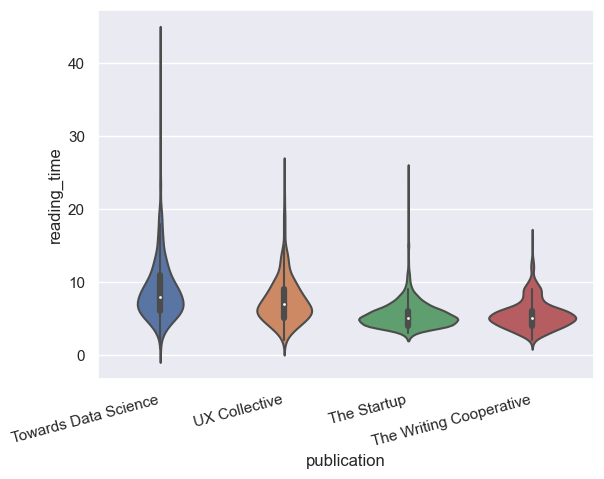

In [58]:
sns.violinplot(y = 'reading_time', x = 'publication', data = df)
plt.xticks(rotation=15, ha='right')
plt.show()

## 5. Article Responses [3 points]

In this question, we'd like to understand the responses that are earned by each article in the context of its given publication.

**a)** First, generate a data frame that provides the total number of responses for a publication to all articles in our data.  That is, you should have one number recorded for each publication.

**b)** Then, merge the data frame from **part a** into the original data frame for the articles.

**c)** Now, add a new variable to our articles data that records the proportion of responses from the given publication that originate from the article of that row.

**d)** Finally, which article has the most responses relative to its publication?  What proportion of publication responses are due to that article?

Remember to keep all your cells and hit the save icon above periodically to checkpoint (save) your results on your local computer. Once you are satisified with your results restart the kernel and run all (Kernel -> Restart & Run All). **Make sure nothing has changed**. Checkpoint and exit (File -> Save and Checkpoint + File -> Close and Halt). Follow the instructions on the Homework 3 Canvas Assignment to submit your notebook to GitHub.  Be sure to also complete the Gradescope component of this assignment.